In [1]:
import datetime
import os

from lhcpiv import (
    video_to_frame,  dist_to_coords, DLT_2D, resize_rgb, velocity_vectors
)

from openpiv import tools, pyprocess, validation, filters, scaling

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2

sns.set()


In [41]:
folders_list = os.listdir('data/')

In [42]:
folders_list

['11_6ls_30_5cm',
 '27_3ls_33cm',
 '11_6ls_15cm',
 '13_7ls_16cm',
 '27_3ls_32cm',
 '18_5ls_34cm',
 '34_4ls_32cm',
 '18_5ls_18cm',
 '24_4ls_32cm']

In [4]:
videos = {}

for folder_name in folders_list:
    videos_folder = video_to_frame.get_movies_list('data/' + folder_name, "h264")
    videos[folder_name] = videos_folder
    for video in videos_folder:
        video_to_frame.vf('data/' + folder_name + "/" + video + ".h264", qty_frames=30)


Success
Created folder data/11_6ls_30_5cm/20220212210151
Success
Created folder data/11_6ls_30_5cm/20220212210145
Success
Created folder data/11_6ls_30_5cm/20220212210139
Success
Created folder data/11_6ls_30_5cm/20220212210126
Success
Created folder data/27_3ls_33cm/20220212222912
Success
Created folder data/27_3ls_33cm/20220212222918
Success
Created folder data/27_3ls_33cm/20220212222930
Success
Created folder data/27_3ls_33cm/20220212222936
Success
Created folder data/27_3ls_33cm/20220212222924
Success
Created folder data/11_6ls_15cm/20220212205207
Success
Created folder data/11_6ls_15cm/20220212205220
Success
Created folder data/11_6ls_15cm/20220212205200
Success
Created folder data/11_6ls_15cm/20220212205226
Success
Created folder data/11_6ls_15cm/20220212205213
Success
Created folder data/13_7ls_16cm/20220212212259
Success
Created folder data/13_7ls_16cm/20220212212252
Success
Created folder data/13_7ls_16cm/20220212212316
Success
Created folder data/13_7ls_16cm/20220212212327
Su

In [5]:
videos

{'11_6ls_30_5cm': ['20220212210133',
  '20220212210151',
  '20220212210145',
  '20220212210139',
  '20220212210126'],
 '27_3ls_33cm': ['20220212222912',
  '20220212222918',
  '20220212222930',
  '20220212222936',
  '20220212222924'],
 '11_6ls_15cm': ['20220212205207',
  '20220212205220',
  '20220212205200',
  '20220212205226',
  '20220212205213'],
 '13_7ls_16cm': ['20220212212259',
  '20220212212252',
  '20220212212316',
  '20220212212327',
  '20220212212307'],
 '27_3ls_32cm': ['20220212223814',
  '20220212223824',
  '20220212223808',
  '20220212223835',
  '20220212223829'],
 '18_5ls_34cm': ['20220212221020',
  '20220212221012',
  '20220212221037',
  '20220212221031',
  '20220212221025'],
 '34_4ls_32cm': ['20220212230118',
  '20220212230136',
  '20220212230112',
  '20220212230130',
  '20220212230124'],
 '18_5ls_18cm': ['20220212215529'],
 '24_4ls_32cm': ['20220212230103']}

In [ ]:
df_video

In [23]:
first_item = list(videos.keys())[0]


In [24]:

images = os.listdir(f"data/{first_item}/{videos[first_item][0]}")
images.sort()
images

['frame10.jpg',
 'frame11.jpg',
 'frame12.jpg',
 'frame13.jpg',
 'frame14.jpg',
 'frame15.jpg',
 'frame16.jpg',
 'frame17.jpg',
 'frame18.jpg',
 'frame19.jpg',
 'frame20.jpg',
 'frame21.jpg',
 'frame22.jpg',
 'frame23.jpg',
 'frame24.jpg',
 'frame25.jpg',
 'frame26.jpg',
 'frame27.jpg',
 'frame28.jpg',
 'frame29.jpg',
 'frame4.jpg',
 'frame5.jpg',
 'frame6.jpg',
 'frame7.jpg',
 'frame8.jpg',
 'frame9.jpg']

In [25]:
DISTS = [0.4, 0.254, 0.4, 0.254, 0.47, 0.47]

FRAMES_COORDS = [
    [758, 381],
    [339, 392],
    [323, 495],
    [788, 483],
]

In [26]:
real_coords = dist_to_coords.calculate(DISTS)
dlt = DLT_2D.DLT_2D(real_coords, FRAMES_COORDS)
dlt.calib()

(array([-1.07013922e+03, -1.43417401e+02,  7.58000000e+02,  2.99647615e+01,
         2.53532842e+02,  3.81000000e+02,  4.66554164e-03, -3.07657997e-01,
         1.00000000e+00]),
 4.3776347495249354e-10)

In [46]:
def get_all_res(path):
    results_files = os.listdir(path)

    for i, file in enumerate(results_files):
        if i == 0:
            df = pd.read_csv(path + "/" + file, sep='\t', na_values='     nan').dropna()
            df['u'] = df['u'].astype('float32')

        else:
            df_aux = pd.read_csv(path + "/" + file, sep='\t', na_values='     nan').dropna()
            df = pd.concat([df, df_aux])
    
    df.columns = ['x', 'y', 'u', 'v', 'mask']
    
    return df

def get_real_velocity(df, dlt):
    df['real_x'] = df.apply(lambda x: dlt.recon((x['x'],x['y']))[0], axis=1)
    df['real_y'] = df.apply(lambda x: dlt.recon((x['x'],x['y']))[1], axis=1)
    df['real_u'] = df.apply(lambda x: dlt.recon((x['u'],x['v']))[0], axis=1)
    df['real_v'] = df.apply(lambda x: dlt.recon((x['u'],x['v']))[1], axis=1)

    return df_final.groupby(['real_x', 'real_y']) \
            [['real_u', 'real_v']] \
            .agg('median') \
            .reset_index(drop=False)

In [32]:
for video in videos:
    print(video)

11_6ls_30_5cm
27_3ls_33cm
11_6ls_15cm
13_7ls_16cm
27_3ls_32cm
18_5ls_34cm
34_4ls_32cm
18_5ls_18cm
24_4ls_32cm


In [33]:
movies = {}

movies[list(videos.keys())[0]] = videos[list(videos.keys())[0]]

In [47]:
for vazao in movies:
    for movie in movies[vazao]:
        preffix_path = './data/' + vazao + '/' + movie + '/'

        frames = os.listdir(preffix_path)
        frames.sort()

        pairs = []

        for j, frame in enumerate(frames):
            if j == len(frames) - 1:
                pass
            else:
                pairs.append((frame, frames[j + 1]))

        for frame_a, frame_b in pairs:
            velocity_vectors.calculate(
                preffix_path, 
                frame_a, 
                frame_b,
                winsize=32, searchsize=32, overlap=16, dt=1/25,
                save_fig=False
            )

        df_final = get_all_res(preffix_path + 'piv_results')
        
        df_final.to_csv(
            preffix_path + 'piv_results' + '/final.csv',
            index=False
        )

        print(f'Calculating real velocity of {preffix_path.split("/")[-2]}')

        df_final = get_real_velocity(df_final, dlt)

        df_final.to_csv(
            preffix_path + 'piv_results' + '/final_velocity.csv',
            index=False
        )

        print('Finish!')

Result folder of 20220212210133 doesn't exists... creating...
20220710015158.txt created successfully
20220710015204.txt created successfully
20220710015211.txt created successfully
20220710015218.txt created successfully
20220710015224.txt created successfully
20220710015230.txt created successfully
20220710015235.txt created successfully
20220710015242.txt created successfully
20220710015248.txt created successfully
20220710015255.txt created successfully
20220710015301.txt created successfully
20220710015307.txt created successfully
20220710015313.txt created successfully
20220710015320.txt created successfully
20220710015328.txt created successfully
20220710015335.txt created successfully
20220710015341.txt created successfully
20220710015348.txt created successfully
20220710015354.txt created successfully
20220710015400.txt created successfully
20220710015406.txt created successfully
20220710015412.txt created successfully
20220710015419.txt created successfully
20220710015425.txt

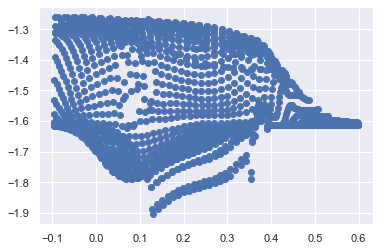

In [39]:
df_final_selected = df_final[((df_final['real_x'] > -0.1)) & ((df_final['real_x'] <= 0.60))]
# df_final_selected = df
plt.scatter(x=df_final_selected['real_x'], y=df_final_selected['real_v'])
plt.show()

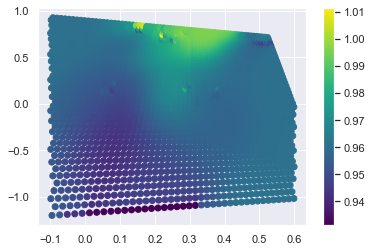

In [ ]:
df_final_selected = df_final[((df_final['real_x'] > -0.1)) & ((df_final['real_x'] <= 0.60))]
# df_final_selected = df
plt.scatter(x=df_final_selected['real_x'], y=df_final_selected['real_y'], c=df_final_selected['real_v'], cmap='viridis')
plt.colorbar()
plt.show()

In [51]:
df_final = get_all_res('./data/20220212222924/' + 'piv_results')
    
df_final.to_csv(
    './data/20220212222924/' + 'piv_results' + '/final.csv',
    index=False
)

print(f'Calculating real velocity of {preffix_path.split("/")[-2]}')

df_final = get_real_velocity(df_final, DISTS, FRAMES_COORDS)

df_final.to_csv(
    './data/20220212222924/' + 'piv_results' + '/final_velocity.csv',
    index=False
)

print('Finish!')

Calculating real velocity of croped
Finish!


In [135]:
import cv2
import numpy as np

image = cv2.imread("./data/20220212222924/croped/frame6.jpg")
image_norm = cv2.rotate(image, cv2.ROTATE_180)

cv2.imshow('original Image', image)
cv2.imshow('Rotated Image', image_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [136]:
cv2.imwrite('./data/20220212222924/croped/rotated/frame6.jpg', image_norm)

True

Result folder of rotated doesn't exists... creating...
20220617020936.txt created successfully


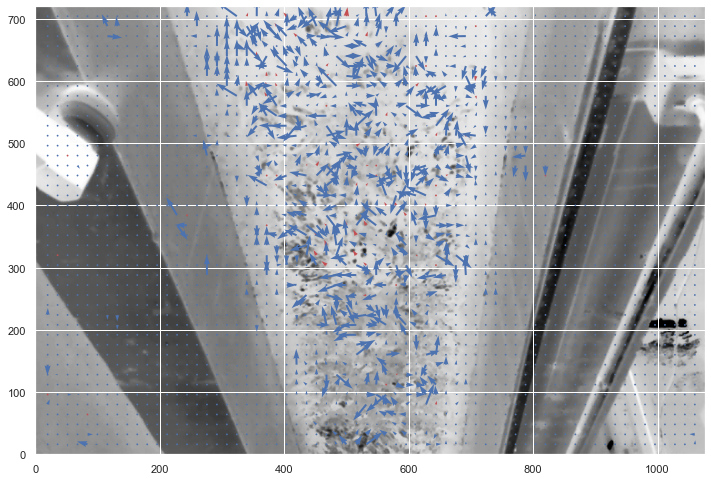

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

In [148]:
winsize =  32 # pixels, interrogation window size in frame A
searchsize = 32  # pixels, search in image B
overlap = int(winsize/2) # pixels, 50% overlap
dt = 1/30 # sec, time interval between pulses

preffix_path = 'data/20220212222924/croped/rotated/'

path_frame_a = 'frame5.jpg'
path_frame_b = 'frame6.jpg'

now = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

frame_a  = tools.imread(preffix_path + path_frame_a)
frame_b  = tools.imread(preffix_path + path_frame_b)

if os.path.exists(preffix_path + '/' + 'piv_results'):
    pass
else:
    os.mkdir(preffix_path + '/' + 'piv_results')
    print(f'Result folder of {preffix_path.split("/")[-2]} doesn\'t exists... creating...')

u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                    frame_b.astype(np.int32), 
                                                    window_size=winsize, 
                                                    overlap=overlap, 
                                                    dt=dt, 
                                                    search_area_size=searchsize, 
                                                    sig2noise_method='peak2peak')

x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                search_area_size=searchsize, 
                                overlap=overlap )

u1, v1, mask = validation.sig2noise_val( u0, v0, 
                                        sig2noise, 
                                        threshold = 1 )
# if you need more detailed look, first create a histogram of sig2noise
# plt.hist(sig2noise.flatten())
# to see where is a reasonable limit    

# filter out outliers that are very different from the
# neighbours

u2, v2 = filters.replace_outliers( u1, v1, 
                                method='localmean', 
                                max_iter=10, 
                                kernel_size=2)

# convert x,y to mm
# convert u,v to mm/sec

#x, y, u3, v3 = scaling.uniform(x, y, u2, v2, 
#                            scaling_factor = 1 ) # 96.52 microns/pixel

# 0,0 shall be bottom left, positive rotation rate is counterclockwise
x, y, u3, v3 = tools.transform_coordinates(x, y, u2, v2)
# u3, v3 = u2, v2

#save in the simple ASCII table format
tools.save(x, y, u3, v3, mask, preffix_path + '/' + f'piv_results/{now}.txt' )
print(f'{now}.txt created successfully')

fig, ax = plt.subplots(figsize=(12,12))
tools.display_vector_field('data/20220212222924/croped/rotated/' + f'piv_results/{now}.txt', 
                        ax=ax, scaling_factor=1, 
                        scale=15000, # scale defines here the arrow length
                        width=0.003, # width is the thickness of the arrow
                        on_img=True, # overlay on the image
                    image_name='data/20220212222924/croped/rotated/frame5.jpg',)

In [71]:
pairs = []

for i, frame in enumerate(frames):
    if i == len(frames) - 1:
        pass
    else:
        pairs.append((frame, frames[i + 1]))


In [75]:
pairs

[('frame0.jpg', 'frame1.jpg'),
 ('frame1.jpg', 'frame2.jpg'),
 ('frame2.jpg', 'frame3.jpg'),
 ('frame3.jpg', 'frame4.jpg')]

In [76]:
cv2.imshow('croped', resize_rgb.resize('data/IMG_1132/croped/' + 'frame1.jpg',
        x1=811, x2=1991, y1=716, y2=3047))
cv2.waitKey(0)

2021-11-21 20:41:34.018 python[37193:1405606] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Auto


32

In [77]:
for frame_a, frame_b in pairs:
    velocity_vectors.calculate('data/IMG_1132/croped/' + frame_a, 
        'data/IMG_1132/croped/' + frame_b,
        save_fig=False
        )

20211121204150.txt created successfully
20211121204151.txt created successfully
20211121204151.txt created successfully
20211121204151.txt created successfully


In [78]:
def get_all_res(path):
    results_files = os.listdir(path)

    for i, file in enumerate(results_files):
        if i == 0:
            df = pd.read_csv(path + "/" + file, sep='\t')

        else:
            df_aux = pd.read_csv(path + "/" + file, sep='\t')
            df = pd.concat([df, df_aux])
    
    return df

In [163]:
df = get_all_res('piv_results')
df.columns = ['x', 'y', 'u', 'v', 'mask']


FileNotFoundError: [Errno 2] No such file or directory: 'piv_results'

In [83]:
df['real_x'] = df.apply(lambda x: dlt.recon((x['x'],x['y']))[0], axis=1)
df['real_y'] = df.apply(lambda x: dlt.recon((x['x'],x['y']))[1], axis=1)
df['real_u'] = df.apply(lambda x: dlt.recon((x['u'],x['v']))[0], axis=1)
df['real_v'] = df.apply(lambda x: dlt.recon((x['u'],x['v']))[1], axis=1)

In [84]:
df

,x,y,u,v,mask,real_x,real_y,real_u,real_v
0,62.0,2265.0,-31.9424,27.3999,1.0,0.600507,1.460890,5.073650,2.102145
1,150.0,2265.0,-16.9808,22.0204,0.0,0.599754,1.395254,5.101877,2.082096
2,238.0,2265.0,-107.5654,121.6188,1.0,0.598997,1.329177,4.667188,2.163193
3,326.0,2265.0,-9.6505,28.3726,0.0,0.598234,1.262654,5.077157,2.067438
4,414.0,2265.0,-15.0326,36.8739,0.0,0.597465,1.195681,5.039111,2.071189
...,...,...,...,...,...,...,...,...,...
333,766.0,65.0,-1.1772,-39.3866,0.0,5.192532,0.800828,5.380660,2.091102
334,854.0,65.0,6.9526,-40.0324,0.0,5.225327,0.648855,5.386741,2.078526
335,942.0,65.0,8.9293,-40.6571,0.0,5.258618,0.494582,5.390375,2.075723
336,1030.0,65.0,117.2242,161.4933,1.0,5.292417,0.337956,4.579834,1.816566


In [87]:
df.groupby(['real_x', 'real_y']).agg({'real_v': ['mean', 'std']})

real_v          
                       mean       std
real_x   real_y                      
0.591128 0.643109  2.067575  0.007133
0.591939 0.713858  2.067994  0.007611
0.592745 0.784117  2.065684  0.009904
0.593545 0.853892  2.061633  0.006680
0.594340 0.923189  2.070059  0.005972
...                     ...       ...
5.192532 0.800828  2.082904  0.006656
5.225327 0.648855  2.076337  0.002698
5.258618 0.494582  2.073811  0.005860
5.292417 0.337956  2.188635  0.286753
5.326735 0.178924  2.070053  0.008158

[338 rows x 2 columns]

In [88]:
df[
    'real_v'
].mean()

2.4186029513909038

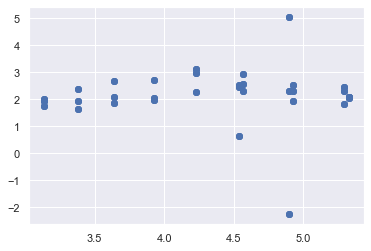

In [92]:
plt.scatter(x=df[df['real_y'] < 0.4]['real_x'], y=df[df['real_y'] < 0.4]['real_v'])

In [ ]:
df_final = pd.read_csv('.data/20220212222924/piv_results/final_velocity.csv')

In [38]:
df_final.groupby(['real_x', 'real_y']).agg({'real_v': ['mean', 'std']})

real_v          
                        mean       std
real_x    real_y                      
-0.479962 1.266526  1.484627  2.251927
-0.401817 0.872502  1.271152  1.124564
-0.340268 0.562157  1.310062  0.836630
-0.335048 1.264785  1.621128  1.615610
-0.290535 0.311393  1.595369  0.648587
...                      ...       ...
 0.798893 0.839400  0.338312  1.129320
 0.854705 0.514656  0.239110  0.921218
 0.887167 1.250098  0.228082  1.285267
 0.939385 0.835526  0.152518  1.017836
 1.048283 1.248162  0.037697  1.105982

[77 rows x 2 columns]

In [164]:
df = get_all_res('./data/20220212222924/croped/rotated/piv_results/')
df.columns = ['x', 'y', 'u', 'v', 'mask']

In [165]:
df['x'] = df['x'] - 400
df['y'] = df['y'] - 400

In [166]:
df['real_x'] = df.apply(lambda x: dlt.recon((x['x'],x['y']))[0], axis=1)
df['real_y'] = df.apply(lambda x: dlt.recon((x['x'],x['y']))[1], axis=1)
df['real_u'] = df.apply(lambda x: dlt.recon((x['u'],x['v']))[0], axis=1)
df['real_v'] = df.apply(lambda x: dlt.recon((x['u'],x['v']))[1], axis=1)

In [167]:
df.head()

,x,y,u,v,mask,real_x,real_y,real_u,real_v
0,-380.0,304.0,0.7959,-0.5201,0.0,-0.639578,-1.532227,0.063390,-0.120812
1,-364.0,304.0,0.1454,-0.4474,0.0,-0.613402,-1.529366,0.062714,-0.121039
2,-348.0,304.0,0.2802,-0.5357,0.0,-0.587317,-1.526515,0.062871,-0.120773
3,-332.0,304.0,-1.7022,-1.7552,0.0,-0.561323,-1.523674,0.061148,-0.117168
4,-316.0,304.0,-5.7408,-2.3684,0.0,-0.535421,-1.520843,0.057208,-0.115404


In [168]:
df.describe()

,x,y,u,v,mask,real_x,real_y,real_u,real_v
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,140.000000,-40.000000,-1.518121,15.574263,0.025826,0.195728,-0.130391,0.052557,-0.210171
std,304.858443,203.209793,88.683388,99.220670,0.158645,0.312108,0.611371,0.107668,0.393931
min,-380.000000,-384.000000,-461.718903,-426.083400,0.000000,-0.639578,-1.532227,-1.050006,-2.900007
25%,-124.000000,-212.000000,-2.061450,-1.121275,0.000000,-0.050010,-0.588268,0.058680,-0.146995
50%,140.000000,-40.000000,-0.043350,0.225050,0.000000,0.205977,-0.006240,0.062333,-0.123054
75%,404.000000,132.000000,1.739625,8.108525,0.000000,0.452842,0.396230,0.064205,-0.119028
max,660.000000,304.000000,423.662689,464.451300,1.000000,0.890042,0.703370,0.545715,0.744269


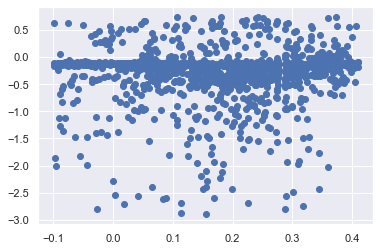

In [170]:
df_final_selected = df[((df['real_x'] > -0.1)) & ((df['real_x'] <= 0.41))]
# df_final_selected = df
plt.scatter(x=df_final_selected['real_x'], y=df_final_selected['real_v'])

In [171]:
df_final_selected['real_v'].mean()

-0.279614462885915

In [52]:
df_final.describe()

,x,y,u,v,mask,real_x,real_y,real_u,real_v
count,11616.00000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000
mean,540.00000,360.000000,-3.084142,-7.078229,0.031336,0.195728,-0.130391,0.961954,-1.638771
std,304.81907,203.183548,86.083298,101.161441,0.174232,0.312068,0.611292,0.200680,0.990008
min,20.00000,16.000000,-464.488200,-461.227200,0.000000,-0.639578,-1.532227,0.310566,-11.846659
25%,276.00000,188.000000,-1.940500,-5.289400,0.000000,-0.050010,-0.588268,0.928019,-1.492937
50%,540.00000,360.000000,-0.005200,-0.167850,0.000000,0.205977,-0.006240,0.932012,-1.460727
75%,804.00000,532.000000,1.958975,1.974675,0.000000,0.452842,0.396230,0.940246,-1.446873
max,1060.00000,704.000000,429.917800,461.227200,1.000000,0.890042,0.703370,3.797117,0.238912


In [118]:
dlt.recon([-390.066,-152.1274])

array([ 1.76435084, -2.55698166])